# Infusion dose example

In [1]:
# Primary abm python platform
import plotnine as p9
# For mathematical operations
import numpy as np
import pandas as pd

import abm

In [2]:
def simulate_injection_model(models, time):
    # Creating the simulation object
    simulation = abm.simulate(
        models = models,
        times=time,
        abstol=1e-15,
        reltol=1e-6
    ).to_pandas()

    # Running the simulation and assigning the results to remote_simulation
    p = (p9.ggplot(simulation, p9.aes('t', 'drug'))
    + p9.geom_line()
    + p9.labs(title='Free drug over time',
           x='Time(seconds)',
           y='Free drug (nmol)'))
    display(p)

# Reaction model - Simulation Framework Example

In [3]:
# Create dose_table
# Notice that the durations have to be define in days as well!
infusion_duration_hours = 1
dose_table = {"dose_nmol":[500], "amounts":[500], "times":[[0, 1]],
              "durations":[[infusion_duration_hours, infusion_duration_hours]], "route":["IV_nmol"],
              "amount_unit":['nmol'], 'time_unit':['d'], "duration_unit":['hr']}
dose_table = pd.DataFrame.from_dict(data=dose_table)
dose_table

,dose_nmol,amounts,times,durations,route,amount_unit,time_unit,duration_unit
0,500,500,"[0, 1]","[1, 1]",IV_nmol,nmol,d,hr


Total: 1, Running: 0, Succeeded: 1, Failed: 0

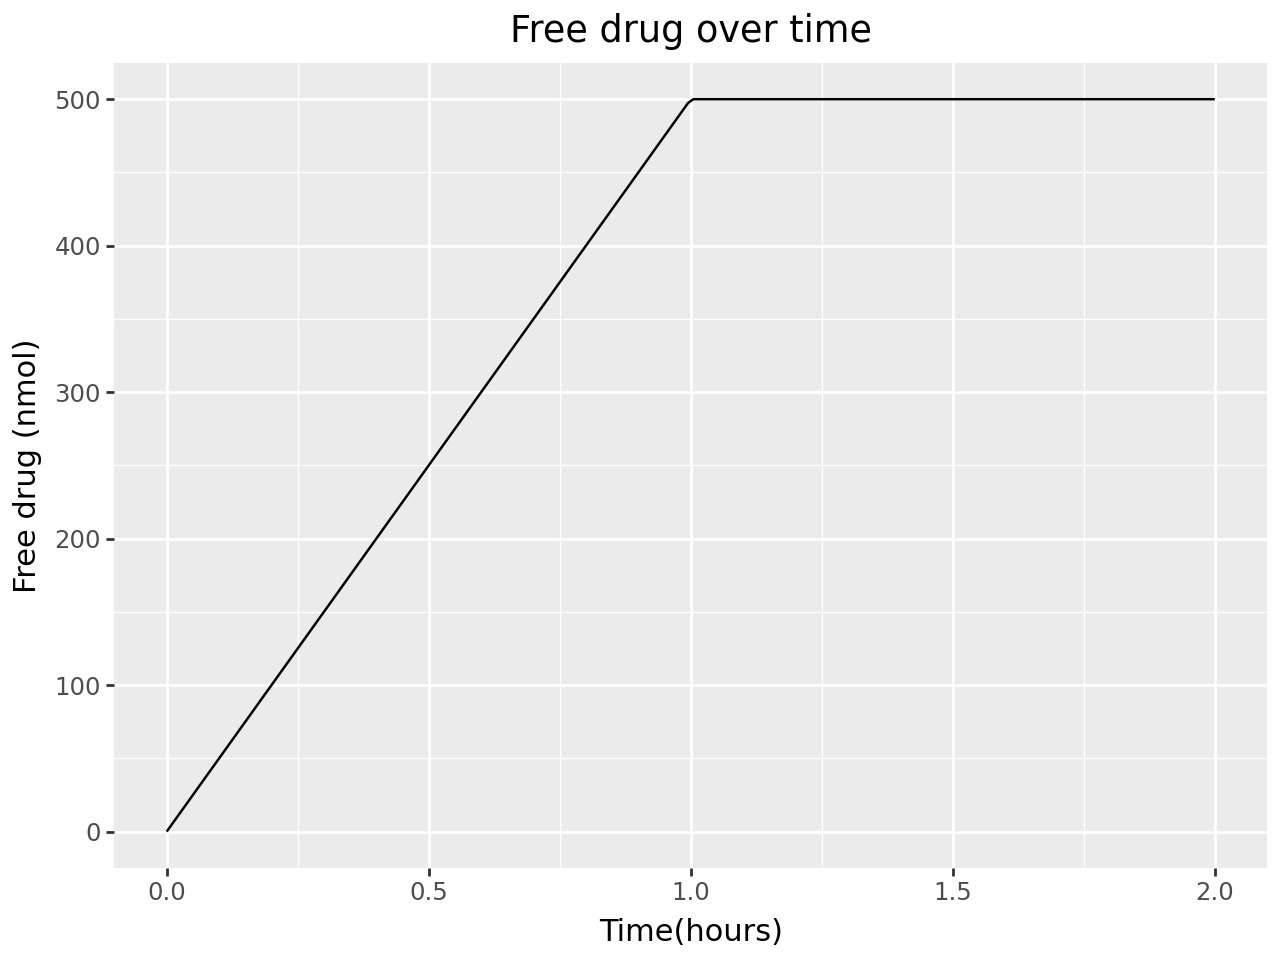

In [4]:
output_times = abm.linspace(0, 2, 200, 'hr')
sim = abm.simulate(
   models="infusion_model_1.model",
   simulations=dose_table[["dose_nmol"]],
   parameters="infusion_model_1_parameter_table.csv",
   doses=dose_table,
   times=output_times,
   outputs=["drug"],
   abstol=1e-15,
   reltol=1e-6
).to_pandas(tall_outputs = True)

p = (p9.ggplot(sim, p9.aes('t/60/60', 'value'))
+ p9.geom_line()
+ p9.labs(title='Free drug over time',
       x='Time(hours)',
       y='Free drug (nmol)'))
display(p)

# Reaction Model Example - amount and duration dose parameters

Total: 1, Running: 0, Succeeded: 1, Failed: 0

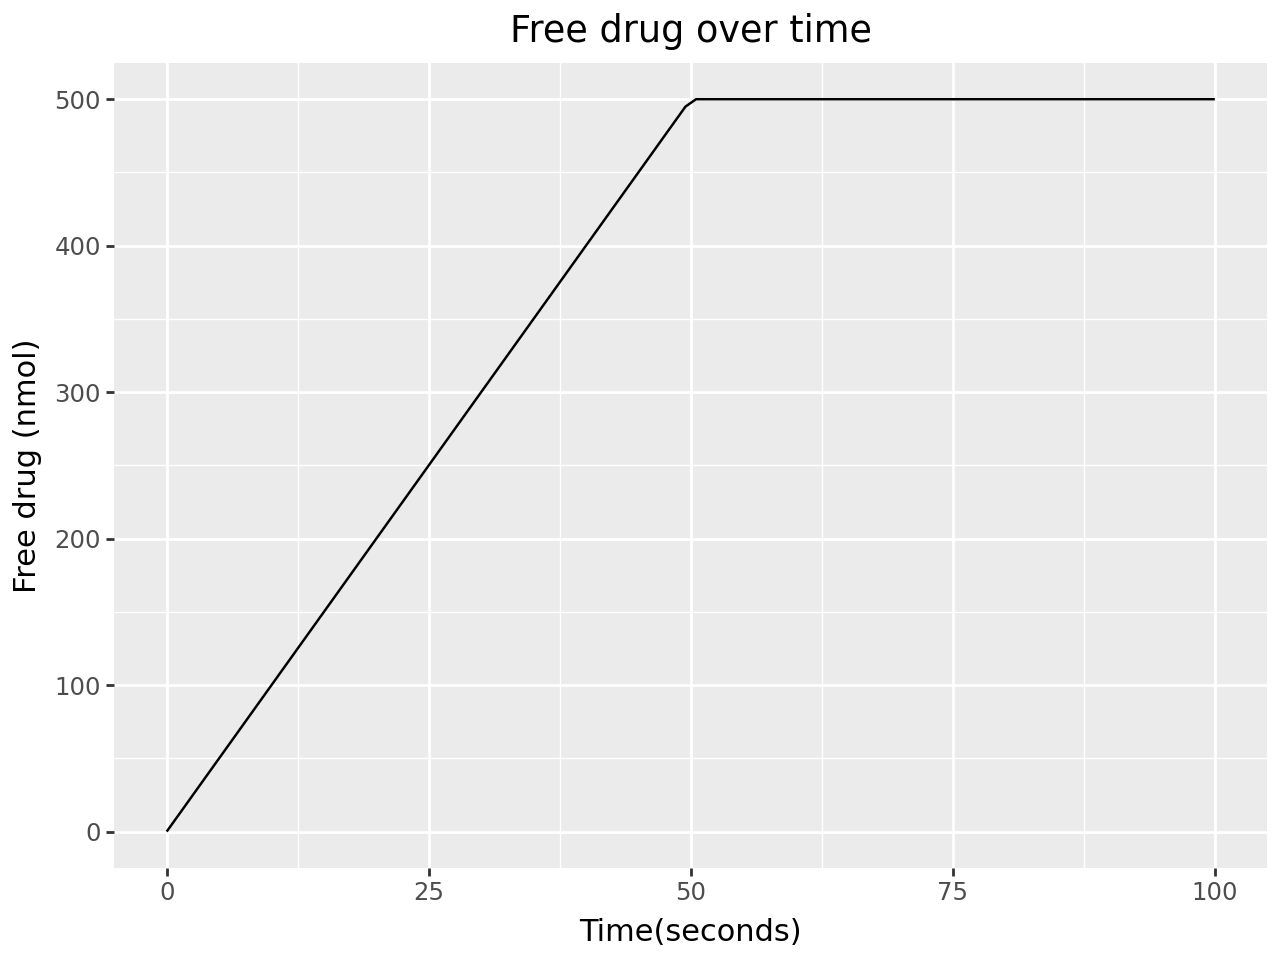

In [5]:
output_times = abm.linspace(0, 100, 100, 's')
s=simulate_injection_model("infusion_model_2.model", output_times)

# Reaction Model Example - amount and duration dose parameters - Multiple doses

Total: 1, Running: 0, Succeeded: 1, Failed: 0

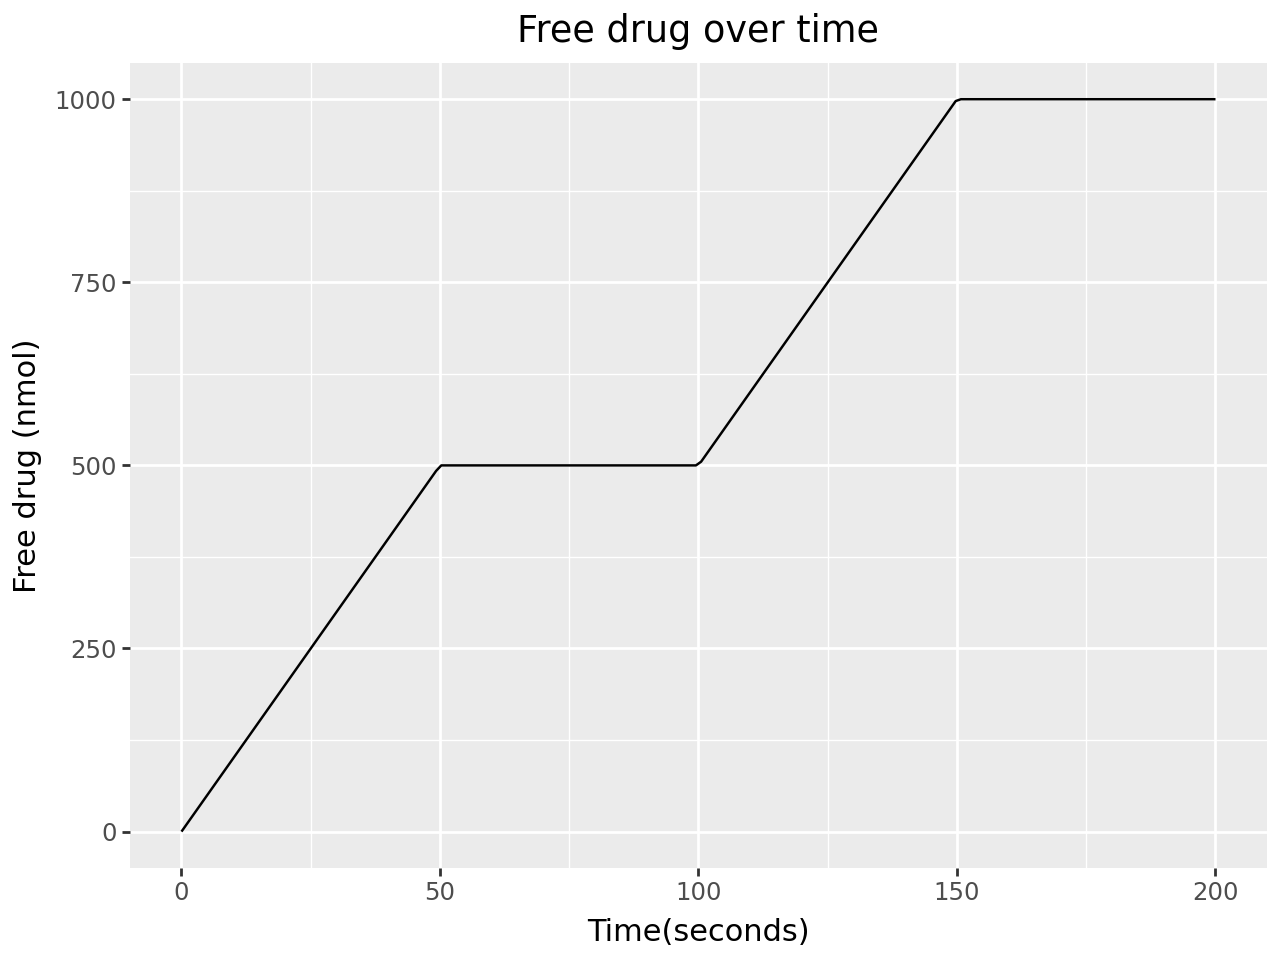

In [6]:
output_times = abm.linspace(0, 200, 200, 's')
s=simulate_injection_model("infusion_model_3.model", output_times)